In [1]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
 # Load the dataset
df = pd.read_csv('uber.csv')

In [2]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
 # Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'].str.replace(' UTC', ''), format='%Y-%m-%d %H:%M:%S')

In [4]:
# Feature engineering: Extracting date and time features
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['day_of_month'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

In [5]:
# Drop the key and datetime columns as they are not needed for modeling
df = df.drop(['key', 'pickup_datetime'], axis=1)

In [6]:
# Handle missing values if any
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day_of_week          0
day_of_month         0
month                0
year                 0
dtype: int64

In [7]:
# Drop rows with missing values (if any)
df = df.dropna()

In [8]:
# Outlier detection and removal using z-score
z_scores = np.abs(stats.zscore(df[['fare_amount', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count']]))
df = df[(z_scores < 3).all(axis=1)]

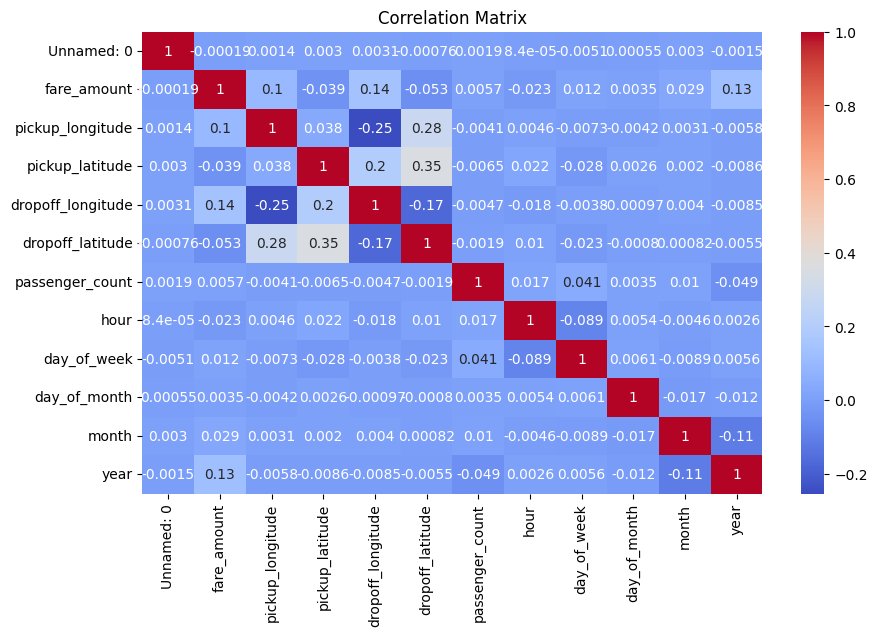

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Split the data into features (X) and target (y)
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [12]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate models using R² and RMSE
def evaluate_model(y_test, y_pred):
 r2 = r2_score(y_test, y_pred)
 rmse = np.sqrt(mean_squared_error(y_test, y_pred))
 return r2, rmse

In [ ]:
# Linear Regression Evaluation
r2_lr, rmse_lr = evaluate_model(y_test, y_pred_lr)
print(f"Linear Regression R²: {r2_lr}, RMSE: {rmse_lr}")

In [ ]:
# Random Forest Evaluation
r2_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf}, RMSE: {rmse_rf}")

In [ ]:
print("\nModel Comparison:")
print(f"Linear Regression- R²: {r2_lr}, RMSE: {rmse_lr}")
print(f"Random Forest- R²: {r2_rf}, RMSE: {rmse_rf}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', color='blue', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.title('Actual vs Predicted Fare')
plt.show()